### Notebook for analysis of distribution

In [1]:
%matplotlib inline
import os
import gc
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [286]:
from statsmodels.stats.proportion import proportions_ztest

In [65]:
import seaborn as sns

In [2]:
def pkl_loader(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [23]:
def file_getter(basedatadir=None, expname=None, nclusters=None, 
                cexpname=None,scope='intra',key_name=None,nstep=256):
    """ scope:= inter / intra 
    """
    datadir = os.path.join(basedatadir, f"{expname}/nclusters-{nclusters}/HAC")
    try:
        tmp = glob.glob(os.path.join(datadir, '*.pkl'))
        a = [i for i in tmp]
        print("Begin loading result files")
        #print(a)
    except Exception as e:
        print(e)
        
    # extract data
    key_list = ['optical thickness','phase',
                'top pressure','effective radius','water path']
    try:
        if key_name in key_list:
            dict_data = pkl_loader(
                glob.glob(os.path.join(
                    datadir, f"sim-{scope}_*_{key_name}_{nstep}.pkl"))[0]
            )
            #sim-{scope}_{cexpname}_{key_name}_{nstep}.pkl
            return dict_data
    except Exception as e:
        print(e)

### Load data

In [115]:
nclusters_list = [4,8,16,32,64,128,256,512]

In [113]:
key_list = ['optical thickness','phase',
                'top pressure','effective radius','water path']

In [114]:
basedatadir='./mod06_anl/hist_large_hac12_2'

--------------------------------------
### RI

#### RI-inter

In [118]:
expname = '4678889'

In [119]:
mod06_ri_inters = {}
cexpname = '*'
scope='inter'
for nclusters in nclusters_list:
    tmp = []
    for key_name in key_list:
        tmp.append(file_getter(basedatadir,expname=expname,nclusters=nclusters,
                                       cexpname=cexpname,scope=scope,key_name=key_name
                        )
        )
    mod06_ri_inters[f'nclusters-{nclusters}'] = tmp

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
B

In [33]:
mod06_ri_inters.keys()

dict_keys(['nclusters-4', 'nclusters-8', 'nclusters-16', 'nclusters-32', 'nclusters-64', 'nclusters-128', 'nclusters-256', 'nclusters-512'])

#### RI-intra

In [120]:
mod06_ri_intras = {}
cexpname = '*'
scope='intra'
for nclusters in nclusters_list:
    tmp = []
    for key_name in key_list:
        tmp.append(file_getter(basedatadir,expname=expname,nclusters=nclusters,
                                       cexpname=cexpname,scope=scope,key_name=key_name
                        )
        )
    mod06_ri_intras[f'nclusters-{nclusters}'] = tmp

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
B

----------------------
### NRI

In [121]:
expname = 'm2_02_global_2000_2018_band28_29_31'

#### NRI-Inter

In [122]:
mod06_nri_inters = {}
cexpname = '*'
scope='inter'
for nclusters in nclusters_list:
    tmp = []
    for key_name in key_list:
        tmp.append(file_getter(basedatadir,expname=expname,nclusters=nclusters,
                                       cexpname=cexpname,scope=scope,key_name=key_name
                        )
        )
    mod06_nri_inters[f'nclusters-{nclusters}'] = tmp

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
B

#### NRI-Intra

In [123]:
mod06_nri_intras = {}
cexpname = '*'
scope='intra'
for nclusters in nclusters_list:
    tmp = []
    for key_name in key_list:
        tmp.append(file_getter(basedatadir,expname=expname,nclusters=nclusters,
                                       cexpname=cexpname,scope=scope,key_name=key_name
                        )
        )
    mod06_nri_intras[f'nclusters-{nclusters}'] = tmp

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
B

-----------------
# Analysis

Dissect key and list: INTER

In [38]:
mod06_ri_inters.keys()

dict_keys(['nclusters-4', 'nclusters-8', 'nclusters-16', 'nclusters-32', 'nclusters-64', 'nclusters-128', 'nclusters-256', 'nclusters-512'])

In [46]:
len(mod06_ri_inters["nclusters-4"]) # five physical parameters

5

In [42]:
mod06_ri_inters["nclusters-4"][0].keys()

dict_keys(['cluster0-cluster1', 'cluster0-cluster2', 'cluster0-cluster3', 'cluster1-cluster2', 'cluster1-cluster3', 'cluster2-cluster3'])

In [43]:
mod06_ri_inters["nclusters-4"][0]['cluster0-cluster1'].keys()

dict_keys(['emd', 'correlation', 'chi-square', 'intersection', 'bhattacharyya'])

In [44]:
for i in mod06_ri_inters["nclusters-4"][0]['cluster0-cluster1'].keys():
    tmp = mod06_ri_inters["nclusters-4"][0]['cluster0-cluster1']
    print(i,tmp[i])

emd 0.0009727332091776638
correlation 0.7850301165500955
chi-square 4887873.512907344
intersection 1579396.0
bhattacharyya 0.21087512913946255


Dissect key and list for Phase: INTER

In [128]:
mod06_ri_inters["nclusters-4"][1].keys() # 1 ZZ

dict_keys(['ncluster-0', 'ncluster-1', 'ncluster-2', 'ncluster-3'])

In [130]:
mod06_ri_inters["nclusters-4"][1]['ncluster-0'].keys()

dict_keys([0, 1, 2, 3])

In [129]:
mod06_ri_intras["nclusters-4"][1].keys()

dict_keys(['ncluster-0', 'ncluster-1', 'ncluster-2', 'ncluster-3'])

In [134]:
len(mod06_ri_intras["nclusters-4"][1]['ncluster-0'].keys())

997

In [150]:
mod06_ri_intras["nclusters-4"][1]['ncluster-0'][0].keys()

dict_keys([0, 1, 2, 3])

In [151]:
mod06_ri_intras["nclusters-4"][1]['ncluster-0'][0][0]

38.018798828125

In [138]:
mod06_ri_intras["nclusters-128"][1].keys()

dict_keys(['ncluster-0', 'ncluster-1', 'ncluster-2', 'ncluster-3', 'ncluster-4', 'ncluster-5', 'ncluster-6', 'ncluster-7', 'ncluster-8', 'ncluster-9', 'ncluster-10', 'ncluster-11', 'ncluster-12', 'ncluster-13', 'ncluster-14', 'ncluster-15', 'ncluster-16', 'ncluster-17', 'ncluster-18', 'ncluster-19', 'ncluster-20', 'ncluster-21', 'ncluster-22', 'ncluster-23', 'ncluster-24', 'ncluster-25', 'ncluster-26', 'ncluster-27', 'ncluster-28', 'ncluster-29', 'ncluster-30', 'ncluster-31', 'ncluster-32', 'ncluster-33', 'ncluster-34', 'ncluster-35', 'ncluster-36', 'ncluster-37', 'ncluster-38', 'ncluster-39', 'ncluster-40', 'ncluster-41', 'ncluster-42', 'ncluster-43', 'ncluster-44', 'ncluster-45', 'ncluster-46', 'ncluster-47', 'ncluster-48', 'ncluster-49', 'ncluster-50', 'ncluster-51', 'ncluster-52', 'ncluster-53', 'ncluster-54', 'ncluster-55', 'ncluster-56', 'ncluster-57', 'ncluster-58', 'ncluster-59', 'ncluster-60', 'ncluster-61', 'ncluster-62', 'ncluster-63', 'ncluster-64', 'ncluster-65', 'ncluster

Dissect key and list: INTRA

In [87]:
mod06_ri_intras.keys()

dict_keys(['nclusters-4', 'nclusters-8', 'nclusters-16', 'nclusters-32', 'nclusters-64', 'nclusters-128', 'nclusters-256', 'nclusters-512'])

In [88]:
mod06_ri_intras["nclusters-4"][0].keys()

dict_keys(['ncluster-0', 'ncluster-1', 'ncluster-2', 'ncluster-3'])

In [92]:
len(mod06_ri_intras["nclusters-4"][0]['ncluster-0'].keys())

65703

-----------
## Inter-metirc

#### Functionize

In [49]:
key_list = ['optical thickness','phase',
                'top pressure','effective radius','water path']

In [74]:
def anl_param_inter(m6_dict={},param=None,metric=None,
                   key_list= ['optical thickness','phase',
                              'top pressure','effective radius','water path']):
    """ OUT: pandas.dataframe across k-clusters
        IN
            param: name of physical parameters
    """
    data = []
    for nclusters in m6_dict.keys():
        # nest over number of clusters
        idx = key_list.index(param)
        tmp = []
        for key in mod06_ri_inters[f"{nclusters}"][idx].keys():
            tmp.append(mod06_ri_inters[f"{nclusters}"][idx][key][metric])
        #print(np.array(tmp).shape)
        tmp_np = np.array(tmp)
        tmp_np = tmp_np[np.logical_not(np.isnan(tmp_np))]
        data.append(tmp_np)
    
    # pandas to summarize
    df_data = pd.DataFrame(np.asarray(data))
    indexs = [nclusters for nclusters in m6_dict.keys()]
    df_data.index = indexs
    df_data.columns = [metric]
    return df_data 

In [252]:
def anl_phase_fn(m6_dict={},param=None,ncategory=4,stat=True):
    """ OUT: pandas.dataframe across k-clusters
        IN:  scope; inter-class or intra-class
        Compute mean and variance across inter-intra classes
    """
    # mod06_ri_intras["nclusters-4"][1][0-len(patches)][0-4]
    #if scope == 'inter':
    try:
        data = []
        means = []
        stdvs = []
        for nclusters in m6_dict.keys():
            # nest over number of clusters
            idx = key_list.index(param)
            tmp = []
            for key in mod06_ri_inters[f"{nclusters}"][idx].keys():
                key_tmp = np.zeros((ncategory))
                for iclass in range(ncategory):
                    #print(mod06_ri_inters[f"{nclusters}"][idx][key])
                    key_tmp[iclass] = mod06_ri_inters[f"{nclusters}"][idx][key][iclass]
                tmp.append(np.expand_dims(key_tmp,axis=0))
            tmp_np = np.concatenate(tmp,axis=0)
            #print(tmp_np.shape)
            #### compute data
            mean = np.nanmean(tmp_np,axis=0)
            stdv = np.nanstd(tmp_np,axis=0)
            #print(mean.shape, stdv.shape)
            #### append
            means.append(mean)
            stdvs.append(stdv)
            data.append(tmp_np)

        
        # pandas to summarize
        if stat:
            """ return stats info
            """
            return means, stdvs
        else:
            """return all info
            """
            # ready for vairable names
            variables = []
            for ndata in [i.shape[0] for i in data]:
                #variables.extend([f"{ndata}" for i in range(ndata*ncategory)])
                variables.extend([f"nclusters-{ndata}" for i in range(ndata*ncategory)])
            #print(len(variables))
            
            # append dataset
            #print(data[0].shape) # {#nclusters, 4}
            all_data = []
            classes = []
            category_name=['clear sly','liquid','ice','mix']
            for idata in data:
                #print(idata.shape)
                for jdata in idata:
                    for i in range(ncategory):
                        all_data.append(jdata[i])
                        classes.append(category_name[i])
            
            #print(len(all_data))
            df_data = pd.DataFrame({
                'variable':np.array(variables),
                'value': np.array(all_data),
                'category':np.array(classes),
                }
            )

            return df_data 
    except Exception as e:
        print(e)

Practice

In [221]:
anl_phase_fn(m6_dict=mod06_ri_inters,param=key_list[1],ncategory=4,stat=False)

4080
(4, 4)
(4, 4)
(8, 4)
(16, 4)
(32, 4)
(64, 4)
(128, 4)
(256, 4)
(512, 4)
4080


,variable,value,category
0,nclusters-4,23.169621,clear sly
1,nclusters-4,26.331359,liquid
2,nclusters-4,28.520807,ice
3,nclusters-4,21.978213,mix
4,nclusters-4,2.813763,clear sly
5,nclusters-4,55.989753,liquid
6,nclusters-4,19.328393,ice
7,nclusters-4,21.868091,mix
8,nclusters-4,13.108807,clear sly
9,nclusters-4,37.297894,liquid


- optical thickness

In [75]:
ot_emd_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[0],metric='emd')

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [76]:
ot_emd_ri_inter

,emd
nclusters-4,"[0.0009727332091776638, 0.00041352283320900287..."
nclusters-8,"[0.0007352756064111614, 0.001147414438812062, ..."
nclusters-16,"[0.0005722572715547873, 0.0002842862425007205,..."
nclusters-32,"[0.0023941351800952928, 0.00198599277265808, 0..."
nclusters-64,"[0.0004580343885316812, 0.0018421150179481344,..."
nclusters-128,"[0.002023597547943604, 0.0015103310489708729, ..."
nclusters-256,"[0.0030786447805075507, 0.0018935309116312445,..."
nclusters-512,"[0.0013991097858148164, 0.0022871773484194825,..."


In [84]:
ot_bat_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[0],metric='bhattacharyya')

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [97]:
ot_cor_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[0],metric='correlation')

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [77]:
ot_emd_ri_inter['emd']['nclusters-32'].shape

(465,)

- Top Pressure

In [93]:
tp_emd_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[2],metric='emd')

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [94]:
tp_bat_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[2],metric='bhattacharyya')

In [98]:
tp_cor_ri_inter = anl_param_inter(m6_dict=mod06_ri_inters,param=key_list[2],metric='correlation')

- Phase

In [173]:
tp_ri_means, tp_ri_stdvs = anl_phase_fn(m6_dict=mod06_ri_inters,param=key_list[1],ncategory=4,stat=True)

In [253]:
phase_ri = anl_phase_fn(m6_dict=mod06_ri_inters,param=key_list[1],ncategory=4,stat=False)

----------------
### Visualization

- Optical Thickness

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


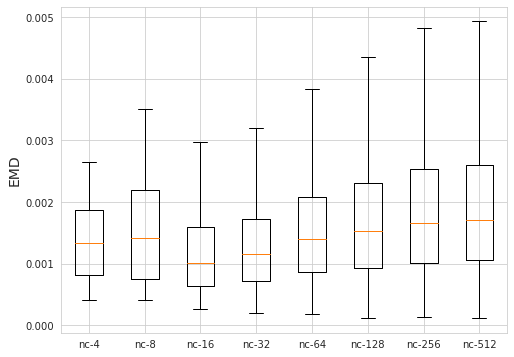

In [83]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([ot_emd_ri_inter['emd'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('EMD',fontsize=14)
plt.show()

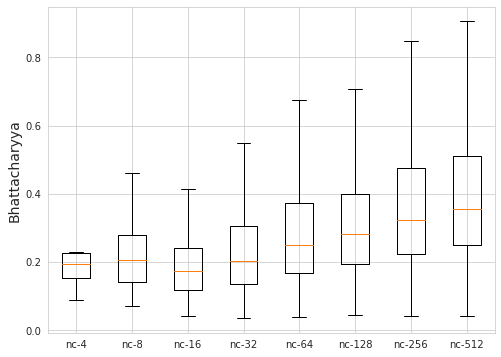

In [86]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([ot_bat_ri_inter['bhattacharyya'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('Bhattacharyya',fontsize=14)
plt.show()

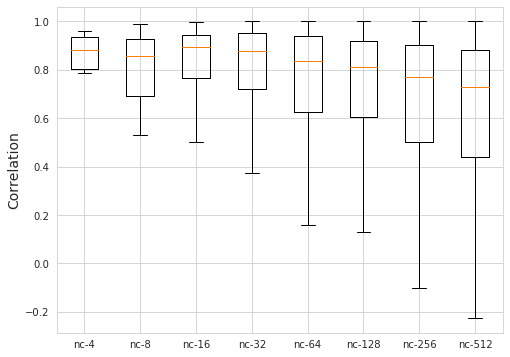

In [99]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([ot_cor_ri_inter['correlation'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('Correlation',fontsize=14)
plt.show()

- Top pressure

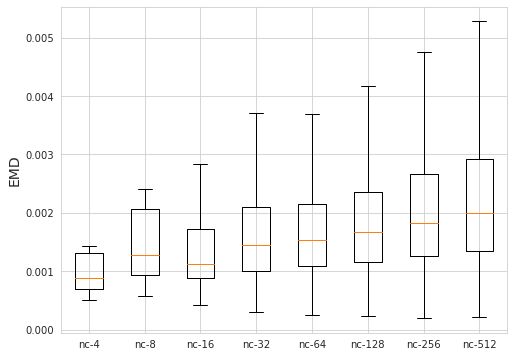

In [95]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([tp_emd_ri_inter['emd'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('EMD',fontsize=14)
plt.show()

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


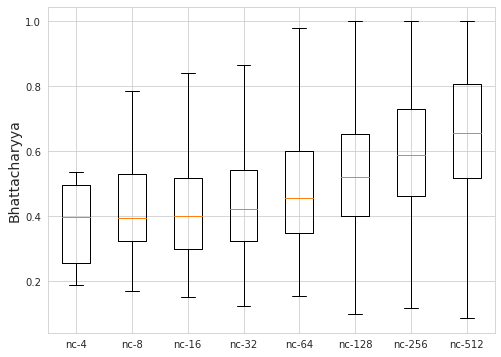

In [96]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([tp_bat_ri_inter['bhattacharyya'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('Bhattacharyya',fontsize=14)
plt.show()

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


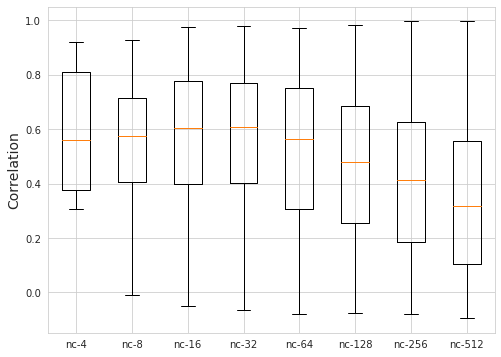

In [100]:
sns.set_style("whitegrid") 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot([tp_cor_ri_inter['correlation'][f'nclusters-{cluster}'] for cluster in nclusters_list],
           labels = [f'nc-{cluster}' for cluster in nclusters_list],
           showfliers=False
          )
ax.set_ylabel('Correlation',fontsize=14)
plt.show()

- Phase

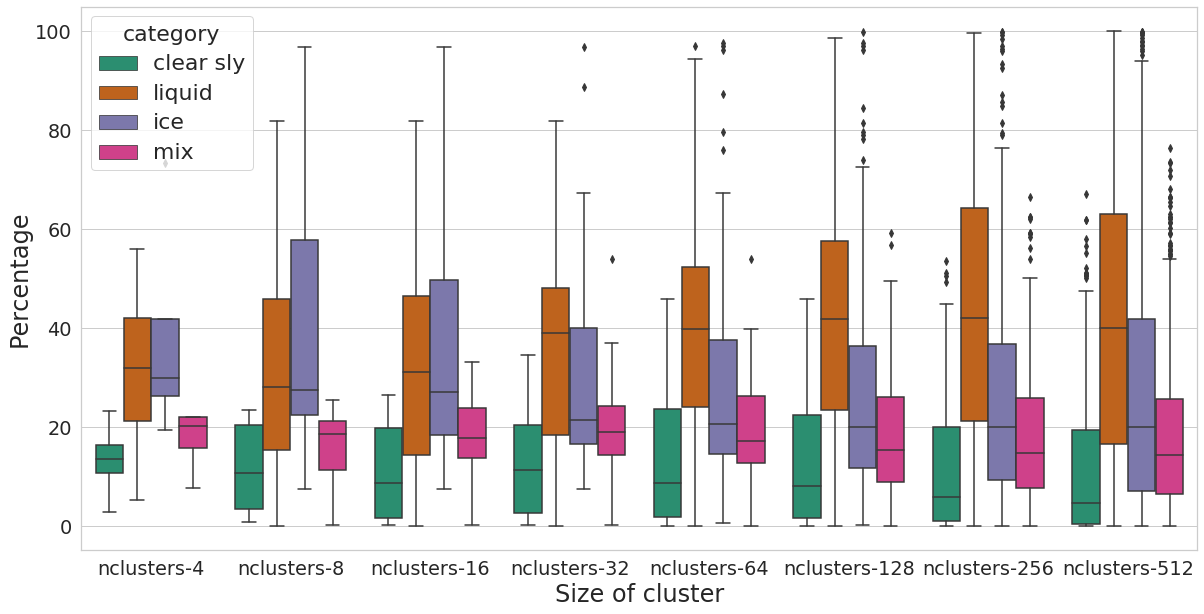

In [255]:
#sns.set_style("whitegrid") 
sns.set(font_scale=1.75,style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='variable', y='value', data=phase_ri, hue='category', palette='Dark2', ax=ax)
ax.set_ylabel('Percentage',fontsize=24)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.xlabel("Size of cluster", fontsize=24)
plt.show()

###### Additional analysis: difference of percentage between ice and liquid

- Direct comparison: No standarization for number of population

Selection of data

In [273]:
df_liquid = phase_ri.query('category == "liquid"')
df_liquid.shape

(1020, 3)

In [274]:
df_ice = phase_ri.query('category == "ice"')
df_ice.shape

(1020, 3)

In [275]:
df_diff = pd.DataFrame(np.abs(df_liquid['value'].values - df_ice['value'].values))
df_diff.shape

(1020, 1)

Append data

In [282]:
nc_df = pd.DataFrame(np.array(df_liquid['variable'].values))
df_select = pd.concat([nc_df,df_diff ],axis=1)
df_select.columns = ['variable','diff']
df_select.shape

(1020, 2)

Visualization

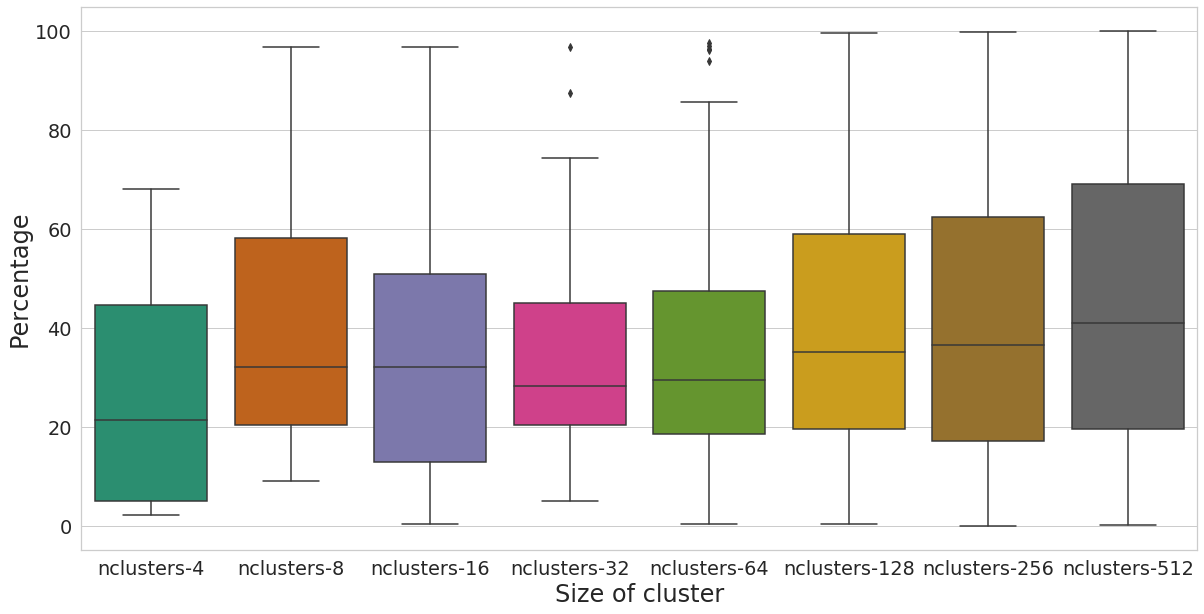

In [285]:
#sns.set_style("whitegrid") 
sns.set(font_scale=1.75,style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='variable', y='diff', data=df_select, palette='Dark2', ax=ax)
ax.set_ylabel('Percentage',fontsize=24)
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.xlabel("Size of cluster", fontsize=24)
plt.show()

### Memo: above graph does not address when ice:liquid = 50:50  and ice:liquid=0:0

--------------------
- Account for number of population: Ztest

In [287]:
df_diff = pd.DataFrame(np.abs(df_liquid['value'].values - df_ice['value'].values))
df_diff.shape

(1020, 1)

In [288]:
df_nobs = pd.DataFrame(np.abs(df_liquid['value'].values + df_ice['value'].values))
df_nobs.shape

(1020, 1)

- Method 1: Consider 0% case

In [300]:
stat_list = []
pval_list = []
liquids = np.squeeze(df_liquid['value'].values)
ices = np.squeeze(df_ice['value'].values)
for idx, (liquid, ice) in enumerate(zip(liquids, ices)):
    count = np.array([liquid,ice])
    nobs  = np.array([100,100])
    stat, pval = proportions_ztest(count, nobs,)
    stat_list.append(stat)
    pval_list.append(pval)

- Method 2: Larger than 0 %

In [310]:
stat_list = []
pval_list = []
var_list = []
liquids = np.squeeze(df_liquid['value'].values)
ices = np.squeeze(df_ice['value'].values)
var = np.array(df_liquid['variable'].values)
for idx, (liquid, ice, ivar) in enumerate(zip(liquids, ices,var)):
    if liquid > 0 and ice > 0:
        count = np.array([liquid,ice])
        nobs  = np.array([100,100])
        stat, pval = proportions_ztest(count, nobs,)
        stat_list.append(stat)
        pval_list.append(pval)
        var_list.append(ivar)

In [311]:
nc_df = pd.DataFrame(np.array(var_list))
df_pval = pd.DataFrame(np.array(pval_list))
df_select3 = pd.concat([nc_df,df_pval ],axis=1)
df_select3.columns = ['variable','pval']
df_select3.shape

(1006, 2)

Method1

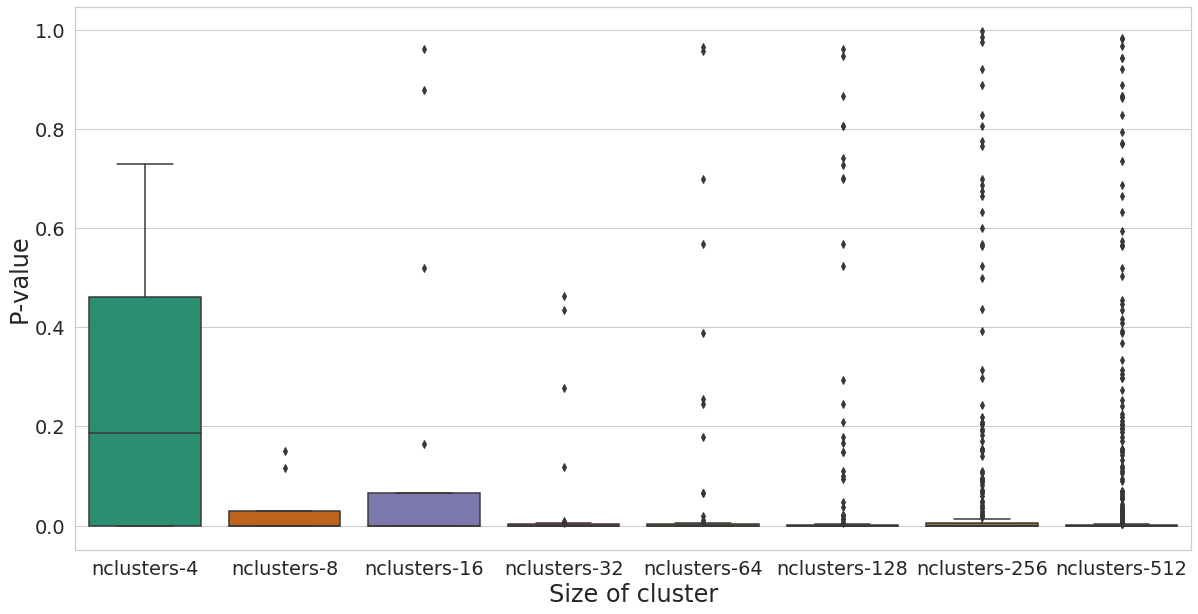

In [306]:
#sns.set_style("whitegrid") 
sns.set(font_scale=1.75,style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='variable', y='pval', data=df_select2, palette='Dark2', ax=ax)
ax.set_ylabel('P-value',fontsize=24)
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.xlabel("Size of cluster", fontsize=24)
plt.show()

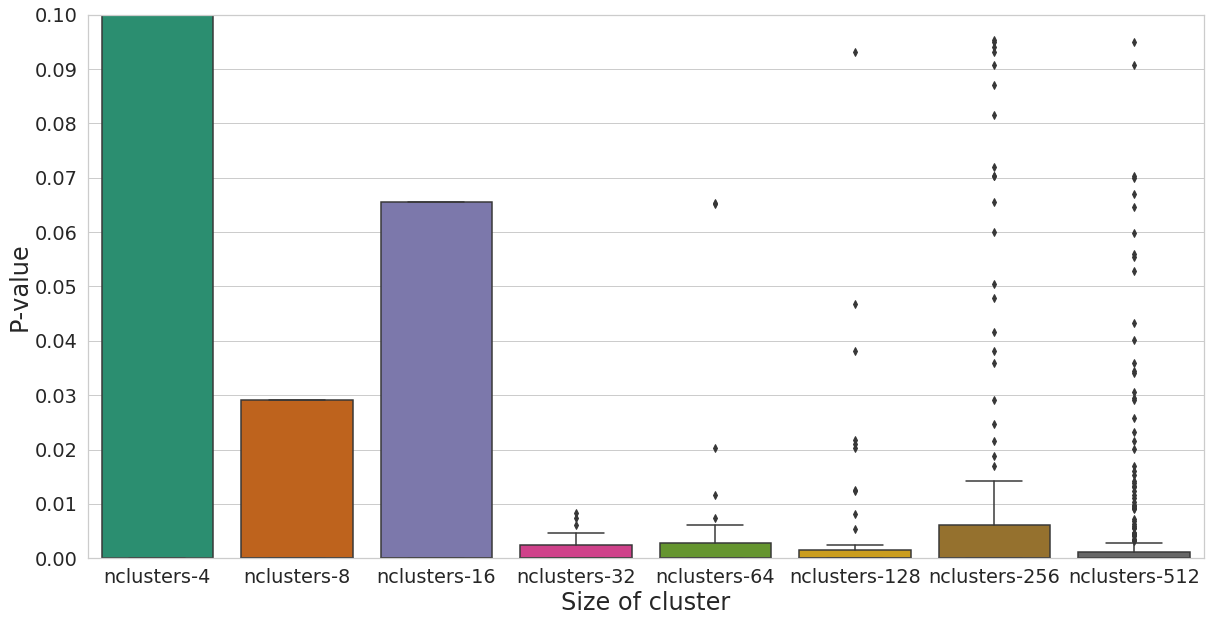

In [322]:
#sns.set_style("whitegrid") 
sns.set(font_scale=1.75,style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='variable', y='pval', data=df_select2, palette='Dark2', ax=ax)
ax.set_ylabel('P-value',fontsize=24)
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
#ax.plot([0]+[f'nclusters-{i}' for i in nclusters_list]+[0], [0.05 for i in range(len(nclusters_list)+2)],
#       linestyle='--', c='black', linewidth=8)
plt.xlabel("Size of cluster", fontsize=24)
plt.ylim(0,0.1)
plt.yticks(np.linspace(0,0.1,11) )
plt.show()

Method2

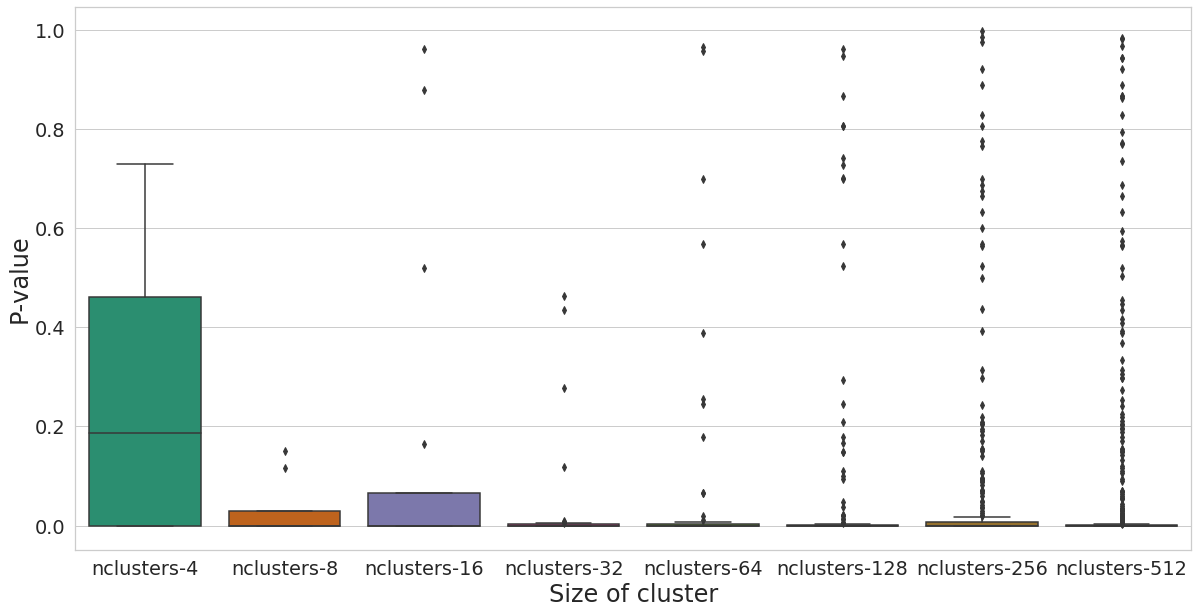

In [312]:
#sns.set_style("whitegrid") 
sns.set(font_scale=1.75,style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='variable', y='pval', data=df_select3, palette='Dark2', ax=ax)
ax.set_ylabel('P-value',fontsize=24)
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.xlabel("Size of cluster", fontsize=24)
plt.show()

### Analysis results:
Values close to 0 indicate that the observed difference is unlikely to be due to chance, whereas a P value close to 1 suggests no difference between the groups other than due to chance.


#### Memo:
- These values are not following (mean = 0, stdv=1) so may not appropriate